In [1]:
import numpy as np
import pandas as pd


In [2]:
df= pd.read_csv('/content/50_Startups.csv')


In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37


### MULTI-LINEAR REGRESSION

In [4]:
data = pd.read_csv('/content/50_Startups.csv')

In [5]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37


In [6]:
data.shape

(108, 5)

In [7]:
data.info() # state is object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [8]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [9]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
data.State.nunique()

3

In [13]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [14]:
data.State.value_counts()

New York      39
California    36
Florida       33
Name: State, dtype: int64

In [15]:
# Encoding the categorical column


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data.State= le.fit_transform(data.State) # alphabetically it gets encoded

In [18]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [19]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,1.027778,113523.760000
std,44996.368152,27322.385654,117937.942120,0.836753,38991.013654
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,0.000000,90708.190000
50%,75791.365000,122699.795000,239452.750000,1.000000,109543.120000
75%,101913.080000,145077.580000,298664.470000,2.000000,141585.520000
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [20]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241379,0.725978,0.056264,0.964770
Administration,0.241379,1.000000,-0.024699,0.039406,0.198849
Marketing Spend,0.725978,-0.024699,1.000000,0.055431,0.748957
State,0.056264,0.039406,0.055431,1.000000,0.061662
Profit,0.964770,0.198849,0.748957,0.061662,1.000000


<Axes: >

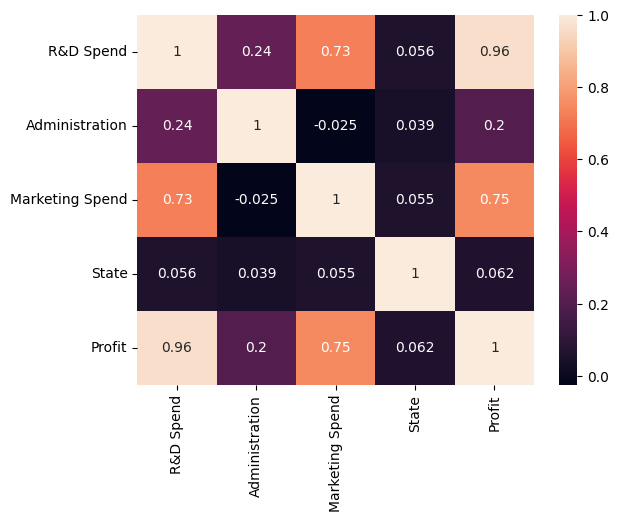

In [22]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [23]:
data.corr().Profit.sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.964770
Marketing Spend    0.748957
Administration     0.198849
State              0.061662
Name: Profit, dtype: float64

In [24]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [25]:
X = data.drop(columns = ['Profit'],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [26]:
Y = data.Profit

In [28]:
Y

0      192261.83
1      191792.06
2      191050.39
3      182901.99
4      166187.94
         ...    
103    132602.65
104    129917.04
105    126992.93
106    125370.37
107    124266.90
Name: Profit, Length: 108, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()

In [31]:
X_scaled = pd.DataFrame(scale.fit_transform(X),columns = X.columns) # -1 to 1 scaling, min-max scaling - 0 to 1
X_scaled.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


In [32]:
# Train Test split

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size= 0.2,random_state=0)

In [36]:
x_train.shape # for training the model

(86, 4)

In [37]:
x_test.shape # for testing the model

(22, 4)

### MODEL BUILDING

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [39]:
# Fit our model on the training data

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
# testing step

y_predict = lr.predict(x_test) # stores the predicted y variables

In [59]:
y_predict1= lr.predict(x_train)
y_predict1

array([110339.36711747, 171326.34156933,  98169.73349428, 173984.89235457,
       116394.84120632,  48728.97472674,  98701.8096438 , 155793.74222107,
        83173.3979165 , 193329.17668167, 188881.89497877, 163705.08384309,
       129123.46097713, 116687.20083441, 116394.84120632, 129222.38731942,
       115568.27177598, 129123.46097713, 112966.00035112,  97478.45007514,
        60870.14590928, 188881.89497877,  75059.36096014,  70421.48595141,
        75026.31650688, 171326.34156933, 146304.26215166, 131295.5367997 ,
        75059.36096014,  70560.72299298, 163705.08384309, 149410.05441   ,
       134848.9192467 , 131295.5367997 , 193329.17668167,  89793.68742016,
       102116.15226573, 116752.96050775, 134241.68257226, 134241.68257226,
       110757.21399109,  91210.10094151, 110757.21399109,  98105.33260626,
       152502.87810448, 129222.38731942,  64558.26417224, 173984.89235457,
        97478.45007514, 181561.78529188, 149410.05441   ,  71079.10061908,
       114687.4839992 , 1

In [46]:
pd.DataFrame({'Actual_profit':y_test,'Predicted_profit':y_predict})

,Actual_profit,Predicted_profit
84,64926.08,48379.248684
10,146121.95,134848.919247
75,90708.19,76483.109652
2,191050.39,181561.785292
24,108552.04,112966.000351
100,144259.40,134241.682572
107,124266.90,129222.387319
7,155752.60,160017.059198
16,126992.93,116752.960508
86,42559.73,46260.992641


In [47]:
# based on random value of independent parameters



In [48]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [52]:
lr.predict([[165349.20,136897.80,471784.10,2]])/100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([77189.78815617])

In [53]:
lr.predict([[142107.34,91391.77,366168.42	,2]])/100000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([64769.68228207])

In [54]:

# Evaluation metrics will need to be considered for testing the model's performance.

# R2 Score
# Mean Sqaure Error
# RMSE(Root Mean Square Error)

In [55]:
# MSE = 1/N x (y(actual) - y(predicted))^2

# Less RMSE means the models are good

# R2 Score = 1- MSE(model)/MSE(baseline)

# R2 Score = 1 - SS(res)/ SS(tot)

# SS(res) = SUM(y(actual) - y(prediected))^2

# SS(total) = SUM(y(actual) - y(average))^2

# R2 Score lies from -1 to 1

# SSR> SST , then negative values

## Evaluation metrics for Regression Problem

In [56]:
from sklearn import metrics

In [57]:
# R -Square

#evaluating testing accuracy

print(metrics.r2_score(y_test,y_predict))

0.9258962347553816


In [60]:
# evaluating training accuracy

# to check if the model if overfitting or not- when we train our model we getting good accuracy
# but testing we not getting good testing accuracy (highly over-fitting)
# We can also perform tuning to change our default parameters for model.
# optimisation is not needed here as our model is efficient at prediction.
# tradeoff- testing and training efficiency is almost same.
# under-fitting - testing high but training low (worst case).

print(metrics.r2_score(y_train,y_predict1))

0.937696994680168


In [62]:
# MSE (Mean Square Error)

print(metrics.mean_squared_error(y_test,y_predict))

96015241.54707724


In [63]:
print(metrics.mean_squared_error(y_train,y_predict1))

97196754.62723695


In [64]:
# RMSE (Root Mean Square Error)

print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

9798.7367322057


In [65]:
# Polynomial Regression

# if we get a polynomial relationship between independent parameters and dependent paraemters.


In [ ]:
# in assignment-3 our target is species paramter.

### Polynomial regression
